# Analysis of variance (ANOVA)

***

In [1]:
# For generating random variables.
import numpy as np
# For handling data.
import pandas as pd
# For plotting.
import matplotlib.pyplot as plt
# For t-tests and ANOVA.
import scipy.stats as stats

In [2]:
# Make the plots bigger.
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
# Set parameters for two populations.
popA = {'m': 1.6, 's': 0.1}
popB = {'m': 1.8, 's': 0.1}

# Create two samples, one from each population.
sampA = np.random.normal(popA['m'], popA['s'], 100)
sampB = np.random.normal(popB['m'], popB['s'], 100)

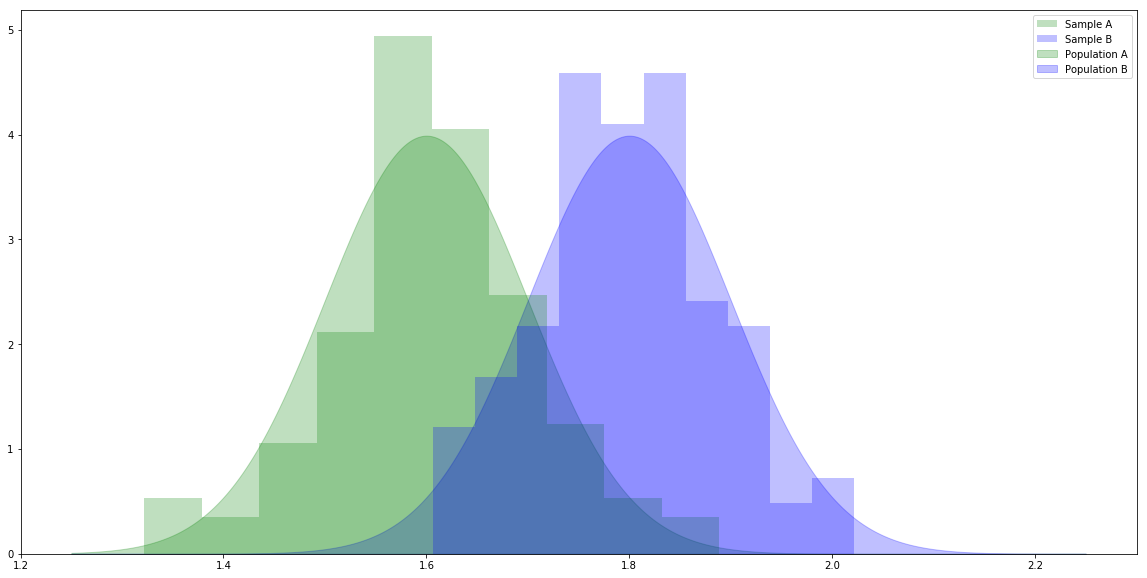

In [4]:
# x values for plotting.
x = np.linspace(1.25, 2.25, 1000)

# The probability density functions (PDFs) for the two populations.
pdfA = stats.norm.pdf(x, popA['m'], popA['s'])
pdfB = stats.norm.pdf(x, popB['m'], popB['s'])

# Plot the population PDFs as shaded regions.
plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(sampB, density=True, color='b', alpha=0.25, label="Sample B")

# Display a legend.
plt.legend()
plt.show()

In [5]:
# Calculate the independent samples t-statistic for the samples.
# We also get the probability of seeing samples at least as different as these given the population means are equal.
stats.ttest_ind(sampA, sampB)

Ttest_indResult(statistic=-14.167823826835964, pvalue=6.352101042683286e-32)

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
s = df[df['species'] == 'setosa']
r = df[df['species'] == 'versicolor']
a = df[df['species'] == 'virginica']

In [8]:
print(stats.ttest_ind(s['petal_length'], r['petal_length']))
print(stats.ttest_ind(s['petal_length'], a['petal_length']))
print(stats.ttest_ind(r['petal_length'], a['petal_length']))

print(stats.ttest_ind(s['petal_width'], r['petal_width']))
print(stats.ttest_ind(s['petal_width'], a['petal_width']))
print(stats.ttest_ind(r['petal_width'], a['petal_width']))

print(stats.ttest_ind(s['sepal_length'], r['sepal_length']))
print(stats.ttest_ind(s['sepal_length'], a['sepal_length']))
print(stats.ttest_ind(r['sepal_length'], a['sepal_length']))

print(stats.ttest_ind(s['sepal_width'], r['sepal_width']))
print(stats.ttest_ind(s['sepal_width'], a['sepal_width']))
print(stats.ttest_ind(r['sepal_width'], a['sepal_width']))

Ttest_indResult(statistic=-39.46866259397272, pvalue=5.717463758170621e-62)
Ttest_indResult(statistic=-49.965703359355636, pvalue=1.5641224158883576e-71)
Ttest_indResult(statistic=-12.603779441384985, pvalue=3.1788195478061495e-22)
Ttest_indResult(statistic=-34.01237858829048, pvalue=4.589080615710866e-56)
Ttest_indResult(statistic=-42.738229672411165, pvalue=3.582719502316063e-65)
Ttest_indResult(statistic=-14.625367047410148, pvalue=2.2304090710248333e-26)
Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487077e-18)
Ttest_indResult(statistic=-15.386195820079404, pvalue=6.892546060674059e-28)
Ttest_indResult(statistic=-5.629165259719801, pvalue=1.7248563024547942e-07)
Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)
Ttest_indResult(statistic=6.289384996672061, pvalue=8.916634067006443e-09)
Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)


[Wikipedia: Multiple Comparisons Problem](https://en.wikipedia.org/wiki/Multiple_comparisons_problem)

[Multiple t tests and Type I error](http://grants.hhp.coe.uh.edu/doconnor/PEP6305/Multiple%20t%20tests.htm)

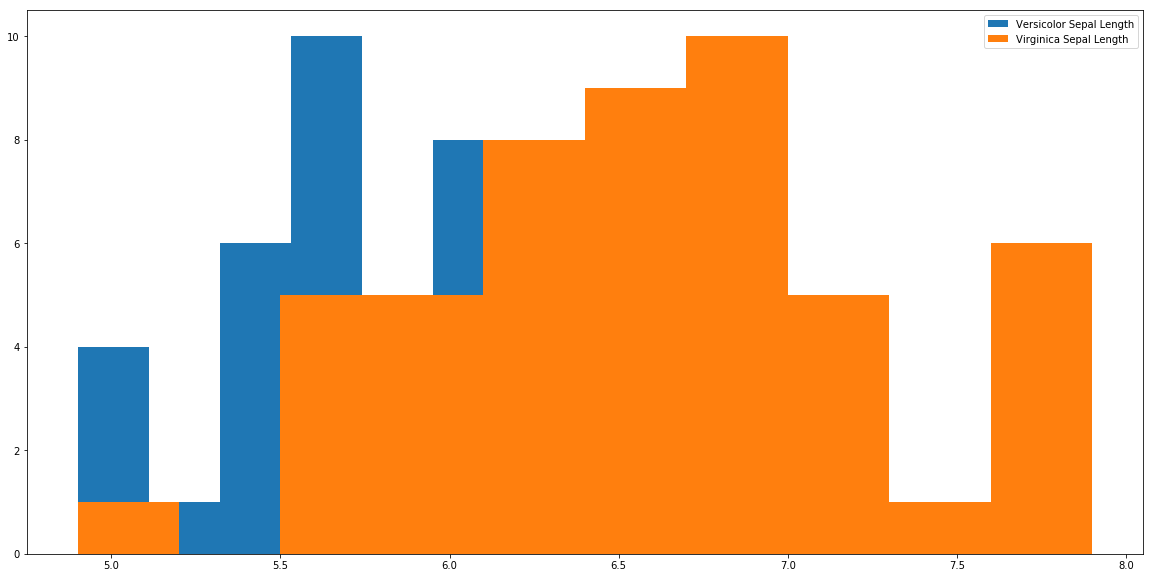

In [9]:
plt.hist(r['sepal_length'], label='Versicolor Sepal Length')
plt.hist(a['sepal_length'], label='Virginica Sepal Length')

plt.legend()

plt.show()

In [10]:
1- ((0.95)**12)

0.45963991233736334

In [11]:
stats.f_oneway(s['petal_length'], r['petal_length'], a['petal_length'])

F_onewayResult(statistic=1179.0343277002194, pvalue=3.0519758018278374e-91)

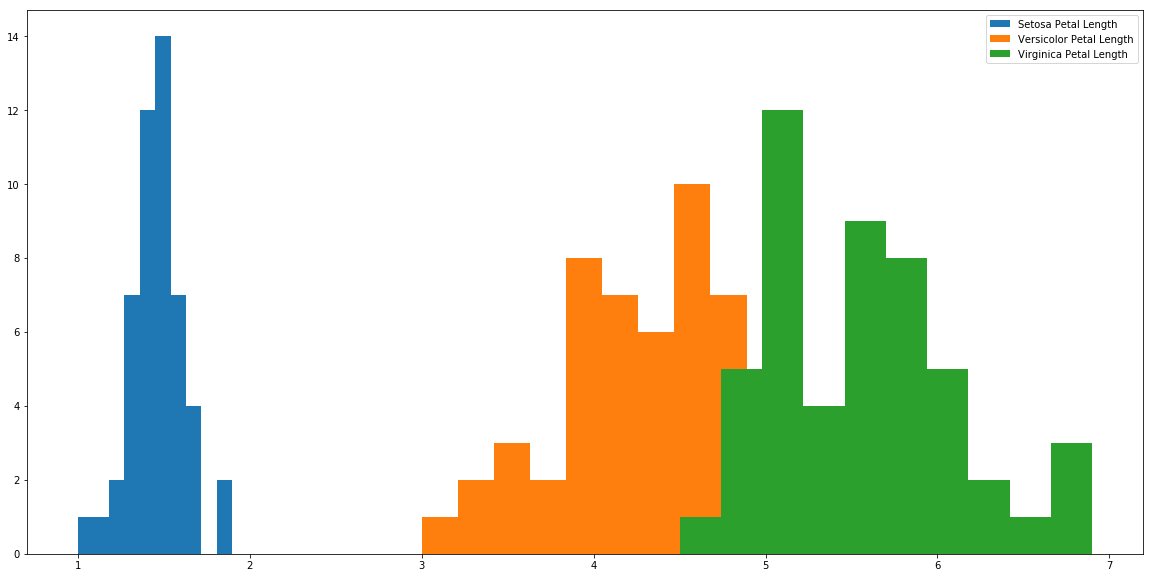

In [12]:
plt.hist(s['petal_length'], label='Setosa Petal Length')
plt.hist(r['petal_length'], label='Versicolor Petal Length')
plt.hist(a['petal_length'], label='Virginica Petal Length')

plt.legend()

plt.show()

***

### About t-tests

When performing an independent sample t-test we assume that there is a given difference between the means of two populations, usually a difference of zero.

We then look at the samples to investigate how different they are, calculating their t-statistic.

We then ask, given the hypothesised difference (usually zero) what was the probability of seeing a t-statistic at least this extreme.

If it's too extreme (say, less that 5% chance of seeing it) then we say our hypothesis about the difference must be wrong.

***

### Errors

Of course, we might, by random chance, see a t-statistic that extreme.

We might reject the hypothesis incorrectly - the populations might have the hypothesised difference and the samples just randomly happened to be as different as they are.

We call that a Type I error.

We also might not reject the hypothesis when it's not true - that's a Type II error.

![Type I and Type II images from https://en.wikipedia.org/wiki/Type_I_and_type_II_errors](https://github.com/ianmcloughlin/images/raw/master/typeitypeii.png)

***

### Calculating the t-statistic

$$ t = \frac{m_A - m_B}{\sqrt{ \frac{S^2}{n_A} + \frac{S^2}{n_B} }} $$

$$ S^2 = \frac{\sum{(x-m_A)^2}+\sum{(x-m_B)^2}}{n_A+n_B-2} $$

In [13]:
# Calculate the means.
mA = sampA.mean()
mB = sampB.mean()

# Count the samples.
nA = len(sampA)
nB = len(sampB)

# Sample variances.
varA = ((sampA - mA)**2).sum() / (nA - 1.0)
varB = ((sampB - mB)**2).sum() / (nB - 1.0)

# Pooled standard deviation.
sp = np.sqrt(((nA - 1) * varA + (nB - 1) * varB) / (nA + nB - 2.0))

# t-statistic
t = (mA - mB) / (sp * np.sqrt((1.0 / nA) + (1.0 / nB)))

print(f"Mean of sample A: {mA}")
print(f"Mean of sample B: {mB}")
print(f"Size of sample A: {nA}")
print(f"Size of sample B: {nB}")
print(f"Pooled std dev:   {sp}")
print(f"t-statistic:      {t}")

Mean of sample A: 1.6076536773677068
Mean of sample B: 1.7973999664536189
Size of sample A: 100
Size of sample B: 100
Pooled std dev:   0.09470112655091872
t-statistic:      -14.167823826835964


#### Critical values

For a two-tail test (e.g. $H_0$: the means are equal) we reject the null hypothesis $H_0$ if the value of the t-statistic from the samples is further away from zero than the t-statistic at the ($0.5 / 2.0 =$) $0.025$ level.

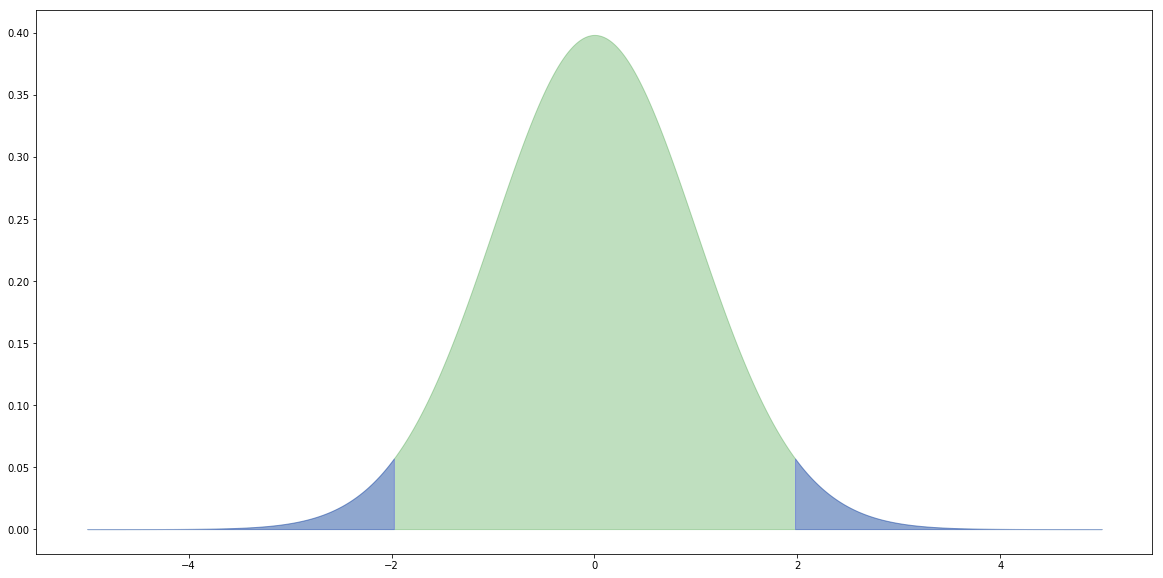

In [14]:
# x values for plotting.
x = np.linspace(-5.0, 5.0, 1000)

# The probability density functions (PDFs) for the t distribution.
# The number of degrees of freedom is (nA + nB - 2).
pdf = stats.t.pdf(x, (nA + nB - 2.0))

# Create a dataframe from x and pdf.
df = pd.DataFrame({'x': x, 'y': pdf})

# Plot the overall distribution.
plt.fill_between(df['x'], df['y'], color='g', alpha=0.25)

# Plot the values more extreme than our |t|.
crit = np.abs(stats.t.ppf(0.975, nA + nB - 2.0))
tail1 = df[df['x'] >=  crit]
tail2 = df[df['x'] <= -crit]
plt.fill_between(tail1['x'], tail1['y'], color='b', alpha=0.25)
plt.fill_between(tail2['x'], tail2['y'], color='b', alpha=0.25)

plt.show()

***

At a level of 0.05, there's a one in twenty chance that we incorrectly reject the null hypotheses.

In [15]:
m = 10.0
s = 1.0
t = 1000
l = 0.05

sum([1 if stats.ttest_ind(np.random.normal(m, s, 100), np.random.normal(m, s, 100))[1] <= l else 0 for i in range(t)])

55

## End